In [77]:
from simple_unet_model import simple_unet_model
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Dataset: https://www.epfl.ch/labs/cvlab/data/data-em/

In [78]:
os.getcwd()

'/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation'

In [79]:
image_directory = os.path.join(os.getcwd(),'original_images/')
mask_directory = os.path.join(os.getcwd(),'masked_images/')

In [80]:
image_directory

'/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/'

In [81]:
mask_directory

'/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/'

In [82]:
SIZE = 256
image_dataset = []
mask_dataset = []

In [83]:
images = os.listdir(image_directory)
for i,image_name in enumerate(images):
    print(image_directory+image_name)
    image = cv2.imread(image_directory+image_name,0)
    image = Image.fromarray(image)
    image = image.resize((SIZE,SIZE))
    image_dataset.append(np.array(image))

/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/15.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/A1.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/19.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/7.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/9.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/8.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/6.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/A3.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/A6.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/13.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/2.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/original_images/12.png
/home/ankit/Desktop/ml/Lipid-Star

In [84]:
masks = os.listdir(mask_directory)
for i,image_name in enumerate(masks):
    print(mask_directory+image_name)
    image = cv2.imread(mask_directory+image_name,0)
    image = Image.fromarray(image)
    image = image.resize((SIZE,SIZE))
    mask_dataset.append(np.array(image))

/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/15.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/A1.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/19.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/7.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/9.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/8.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/6.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/A3.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/A6.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/13.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/2.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation/masked_images/12.png
/home/ankit/Desktop/ml/Lipid-Starch-Semantic-Segmentation

In [85]:
# normalize images
image_dataset = np.expand_dims(normalize(np.array(image_dataset),axis=1),3)

In [86]:
# don't normalize masks, just reshape tp 0 to 1
mask_dataset = np.expand_dims((np.array(mask_dataset)),3)/255.

In [87]:
image_dataset.shape

(25, 256, 256, 1)

In [88]:
mask_dataset.shape

(25, 256, 256, 1)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset,mask_dataset,test_size=0.10,random_state=0)

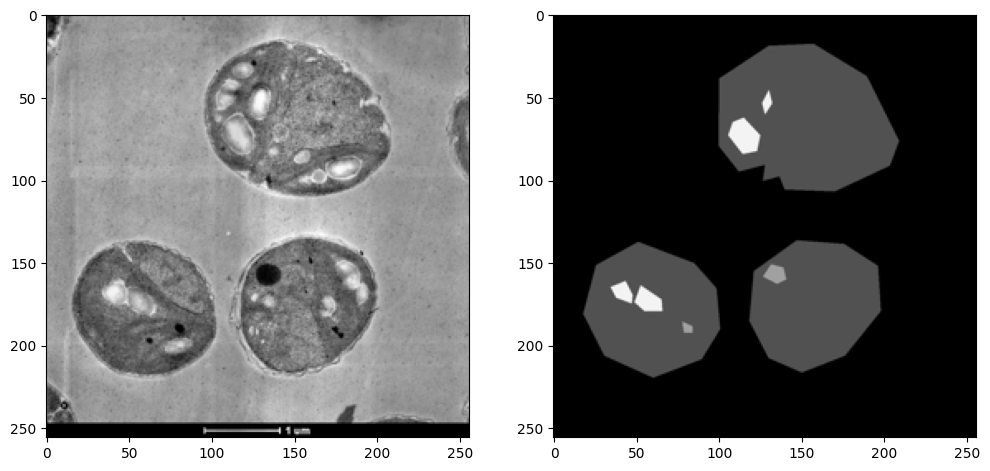

In [90]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

In [91]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = get_model()


#If starting with pre-trained weights. 
#model.load_weights('mitochondria_gpu_tf1.4.hdf5')

history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=1, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

model.save('mitochondria_test.hdf5')

############################################################
#Evaluate the model


	# evaluate model
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


2024-07-23 11:20:13.744957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-23 11:20:13.801626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-23 11:20:13.801984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-23 11:20:13.803616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 32  0           ['conv2d_14[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 256, 256, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatena

2024-07-23 11:20:19.384051: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2024-07-23 11:20:24.914757: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-07-23 11:20:25.306573: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-07-23 11:20:25.764328: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains

NotFoundError: Graph execution error:

Detected at node 'gradient_tape/model/conv2d_16/Conv2D/Conv2DBackpropInput' defined at (most recent call last):
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_5276/3708995067.py", line 14, in <module>
      history = model.fit(X_train, y_train,
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/keras/engine/training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "/home/ankit/Desktop/ml/Tensorflow_ENV/tfenv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model/conv2d_16/Conv2D/Conv2DBackpropInput'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 3: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 25690112 bytes.
  Profiling failure on CUDNN engine 5: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 469835776 bytes.
  Profiling failure on CUDNN engine 0: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
	 [[{{node gradient_tape/model/conv2d_16/Conv2D/Conv2DBackpropInput}}]] [Op:__inference_train_function_3202]

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
#acc = history.history['accuracy']
val_acc = history.history['val_acc']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##################################
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

#######################################################################
#Predict on a few images
model = get_model()
model.load_weights('mitochondria_50_plus_100_epochs.hdf5') #Trained for 50 epochs and then additional 100
#model.load_weights('mitochondria_gpu_tf1.4.hdf5')  #Trained for 50 epochs

test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)

test_img_other = cv2.imread('data/test_images/02-1_256.tif', 0)
#test_img_other = cv2.imread('data/test_images/img8.tif', 0)
test_img_other_norm = np.expand_dims(normalize(np.array(test_img_other), axis=1),2)
test_img_other_norm=test_img_other_norm[:,:,0][:,:,None]
test_img_other_input=np.expand_dims(test_img_other_norm, 0)

#Predict and threshold for values above 0.5 probability
#Change the probability threshold to low value (e.g. 0.05) for watershed demo.
prediction_other = (model.predict(test_img_other_input)[0,:,:,0] > 0.2).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.subplot(234)
plt.title('External Image')
plt.imshow(test_img_other, cmap='gray')
plt.subplot(235)
plt.title('Prediction of external Image')
plt.imshow(prediction_other, cmap='gray')
plt.show()

#plt.imsave('input.jpg', test_img[:,:,0], cmap='gray')
#plt.imsave('data/results/output2.jpg', prediction_other, cmap='gray')

